<h1 align=center><font size = 5>Logistic Regression</font></h1> 

In [1]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt 

<a id="ref0"></a>
<h2> Logistic Function </h2>

In [2]:
torch.manual_seed(2)

In [3]:
z=torch.arange(-100,100,0.1).view(-1, 1)
z

tensor([[-100.0000],
        [ -99.9000],
        [ -99.8000],
        ...,
        [  99.7000],
        [  99.8000],
        [  99.9000]])

In [4]:
sig=nn.Sigmoid()

In [5]:
yhat=sig(z)

Text(0,0.5,'yhat')

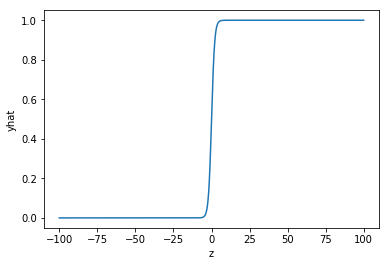

In [6]:
plt.plot(z.numpy(),yhat.numpy())
plt.xlabel('z')
plt.ylabel('yhat')

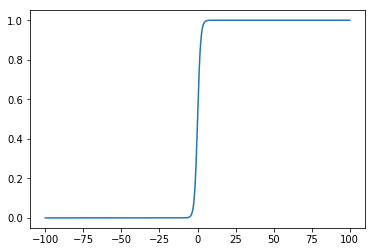

In [7]:
yhat=torch.sigmoid(z)
plt.plot(z.numpy(),yhat.numpy())

<a id="ref0"></a>
<h2>Build a Logistic Regression Using nn.Sequential</h2>

In [8]:
x=torch.tensor([[1.0]])
X=torch.tensor([[1.0],[100]])
print('x=',x)
print('X=',X)

x= tensor([[1.]])
X= tensor([[  1.],
        [100.]])


In [9]:
model=nn.Sequential(nn.Linear(1,1),nn.Sigmoid())

In [10]:
print("list(model.parameters()):\n ", list(model.parameters()))
print( "\nmodel.state_dict():\n ",model.state_dict())

list(model.parameters()):
  [Parameter containing:
tensor([[0.2294]], requires_grad=True), Parameter containing:
tensor([-0.2380], requires_grad=True)]

model.state_dict():
  OrderedDict([('0.weight', tensor([[0.2294]])), ('0.bias', tensor([-0.2380]))])


In [11]:
yhat=model(x)
yhat

tensor([[0.4979]], grad_fn=<SigmoidBackward>)

In [12]:
x=torch.tensor([[1.0,1.0]])
X=torch.tensor([[1.0,1.0],[1.0,2.0],[1.0,3.0]])
print('x=',x)
print('X=',X)

x= tensor([[1., 1.]])
X= tensor([[1., 1.],
        [1., 2.],
        [1., 3.]])


In [13]:
model=nn.Sequential(nn.Linear(2,1),nn.Sigmoid())

In [14]:
print("list(model.parameters()):\n ", list(model.parameters()))
print( "\nmodel.state_dict():\n ",model.state_dict())

list(model.parameters()):
  [Parameter containing:
tensor([[ 0.1939, -0.0361]], requires_grad=True), Parameter containing:
tensor([0.3021], requires_grad=True)]

model.state_dict():
  OrderedDict([('0.weight', tensor([[ 0.1939, -0.0361]])), ('0.bias', tensor([0.3021]))])


In [15]:
yhat=model(x)
yhat

tensor([[0.6130]], grad_fn=<SigmoidBackward>)

In [16]:
yhat=model(X)
yhat

tensor([[0.6130],
        [0.6044],
        [0.5957]], grad_fn=<SigmoidBackward>)

<a id="ref2"></a>
<h2> Build Custom Modules</h2>

In [18]:
class logistic_regression(nn.Module):
    def __init__(self,n_inputs):
        super(logistic_regression,self).__init__()
        self.linear=nn.Linear(n_inputs,1)
    def forward(self,x):
        yhat=torch.sigmoid(self.linear(x))
        return yhat

In [19]:
x=torch.tensor([[1.0]])
X=torch.tensor([[-100],[0],[100.0]])
print('x=',x)
print('X=',X)

x= tensor([[1.]])
X= tensor([[-100.],
        [   0.],
        [ 100.]])


In [20]:
model=logistic_regression(1)

In [21]:
print("list(model.parameters()):\n ", list(model.parameters()))
print( "\nmodel.state_dict():\n ",model.state_dict())

list(model.parameters()):
  [Parameter containing:
tensor([[0.2381]], requires_grad=True), Parameter containing:
tensor([-0.1149], requires_grad=True)]

model.state_dict():
  OrderedDict([('linear.weight', tensor([[0.2381]])), ('linear.bias', tensor([-0.1149]))])


In [22]:
yhat=model(x)
yhat

tensor([[0.5307]], grad_fn=<SigmoidBackward>)

In [23]:
yhat=model(X)
yhat

tensor([[4.0805e-11],
        [4.7130e-01],
        [1.0000e+00]], grad_fn=<SigmoidBackward>)

In [24]:
model=logistic_regression(2)

In [25]:
x=torch.tensor([[1.0,2.0]])
X=torch.tensor([[100,-100],[0.0,0.0],[-100,100]])
print('x=',x)
print('X=',X)

x= tensor([[1., 2.]])
X= tensor([[ 100., -100.],
        [   0.,    0.],
        [-100.,  100.]])


In [26]:
yhat=model(x)
yhat

tensor([[0.2943]], grad_fn=<SigmoidBackward>)

In [27]:
yhat=model(X)
yhat

tensor([[7.7529e-33],
        [3.4841e-01],
        [1.0000e+00]], grad_fn=<SigmoidBackward>)